In [29]:
import dlib

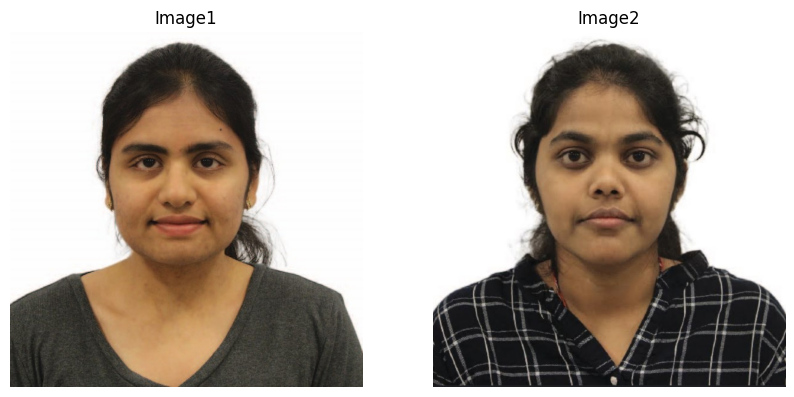

In [70]:
import cv2
from matplotlib import pyplot as plt

# Replace this with your actual file paths
damaged_image_path = 'damaged_face.jpg'
complete_image_path = 'complete_face.jpg'

# Load the damaged and complete images
damaged_image = cv2.imread(damaged_image_path)
complete_image = cv2.imread(complete_image_path)

# Convert images from BGR to RGB for displaying with matplotlib
damaged_image_rgb = cv2.cvtColor(damaged_image, cv2.COLOR_BGR2RGB)
complete_image_rgb = cv2.cvtColor(complete_image, cv2.COLOR_BGR2RGB)

# Display the images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(damaged_image_rgb)
axes[0].set_title('Image1')
axes[0].axis('off')

axes[1].imshow(complete_image_rgb)
axes[1].set_title('Image2')
axes[1].axis('off')

plt.show()


In [71]:
import cv2

# Replace these with the paths to your images
damaged_face_path = 'damaged_face.jpg'
complete_face_path = 'complete_face.jpg'

# Load the images
damaged_face = cv2.imread(damaged_face_path)
complete_face = cv2.imread(complete_face_path)

# Ensure both images were loaded correctly
if damaged_face is None or complete_face is None:
    raise ValueError("Could not load one or both images. Please check the file paths.")

# Get the dimensions to resize to (the smallest of the two images)
new_height = min(damaged_face.shape[0], complete_face.shape[0])
new_width = min(damaged_face.shape[1], complete_face.shape[1])

# Resize both images to the smallest dimensions
resized_damaged_face = cv2.resize(damaged_face, (new_width, new_height), interpolation=cv2.INTER_LINEAR)
resized_complete_face = cv2.resize(complete_face, (new_width, new_height), interpolation=cv2.INTER_LINEAR)

# Now you can save or display the resized images
cv2.imwrite('resized_damaged_face1.jpg', resized_damaged_face)
cv2.imwrite('resized_complete_face1.jpg', resized_complete_face)

True

#### Resized Both Images

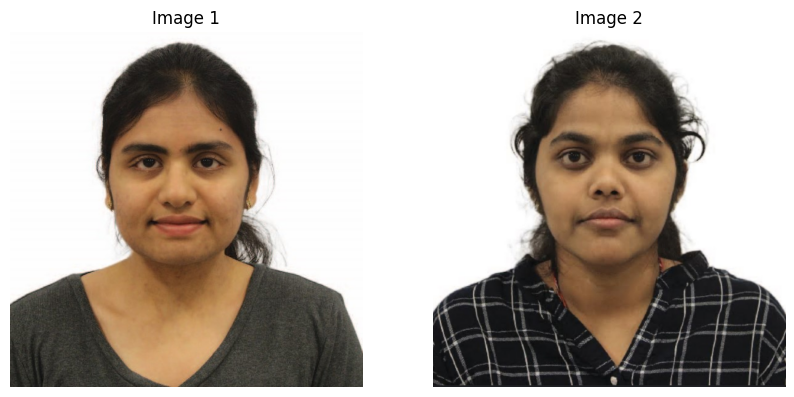

In [72]:
import cv2
import matplotlib.pyplot as plt

def read_and_resize_images(image_path1, image_path2):
    # Read the images
    image1 = cv2.imread(image_path1)
    image2 = cv2.imread(image_path2)

    # Check if images are loaded
    if image1 is None or image2 is None:
        raise ValueError("One or both images didn't load.")

    # Resize images to match the smaller one
    new_height = min(image1.shape[0], image2.shape[0])
    new_width = min(image1.shape[1], image2.shape[1])

    resized_image1 = cv2.resize(image1, (new_width, new_height), interpolation=cv2.INTER_LINEAR)
    resized_image2 = cv2.resize(image2, (new_width, new_height), interpolation=cv2.INTER_LINEAR)
    
    # Convert from BGR to RGB for displaying
    resized_image1 = cv2.cvtColor(resized_image1, cv2.COLOR_BGR2RGB)
    resized_image2 = cv2.cvtColor(resized_image2, cv2.COLOR_BGR2RGB)
    
    # Display the images
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(resized_image1)
    plt.title('Image 1')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(resized_image2)
    plt.title('Image 2')
    plt.axis('off')
    
    plt.show()

# Paths to the images (you can change these to the correct paths for your images)
image_path1 = 'damaged_face.jpg'
image_path2 = 'complete_face.jpg'

# Call the function to read, resize, and display the images
read_and_resize_images(image_path1, image_path2)

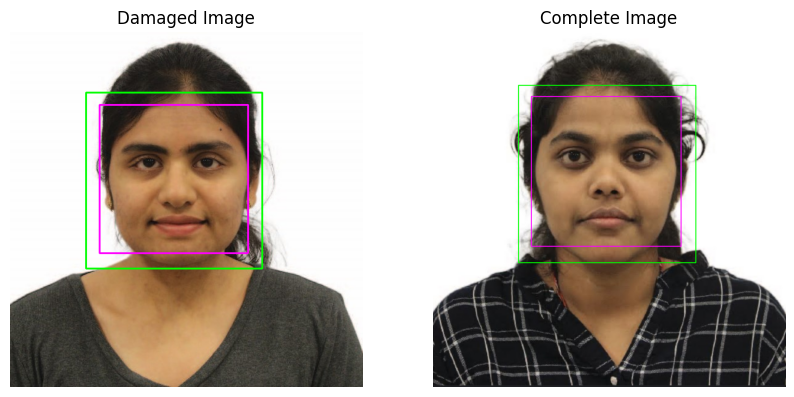

In [73]:
import cv2
from matplotlib import pyplot as plt

# Load the Haar cascade files for face, eye, nose, and mouth detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
nose_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_mcs_nose.xml')
mouth_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_mcs_mouth.xml')

# Load the images
damaged_image_path = 'damaged_face.jpg'
complete_image_path = 'complete_face.jpg'

# Read the images and convert them to grayscale
damaged_image = cv2.imread(damaged_image_path)
complete_image = cv2.imread(complete_image_path)

damaged_gray = cv2.cvtColor(damaged_image, cv2.COLOR_BGR2GRAY)
complete_gray = cv2.cvtColor(complete_image, cv2.COLOR_BGR2GRAY)

# Detect faces in the images
damaged_faces = face_cascade.detectMultiScale(damaged_gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
complete_faces = face_cascade.detectMultiScale(complete_gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Create subplots to display the images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# For damaged image
for (x, y, w, h) in damaged_faces:
    cv2.rectangle(damaged_image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    # Region of interest (ROI) for the face in grayscale and color images
    roi_gray = damaged_gray[y:y+h, x:x+w]
    roi_color = damaged_image[y:y+h, x:x+w]
    
    # Detect eyes within the face ROI
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=5, minSize=(15, 15))
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (255, 0, 0), 2)
    
    # Detect nose within the face ROI
    nose = nose_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=5, minSize=(15, 15))
    for (nx, ny, nw, nh) in nose:
        cv2.rectangle(roi_color, (nx, ny), (nx+nw, ny+nh), (0, 255, 255), 2)
    
    # Detect mouth within the face ROI
    mouth = mouth_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    for (mx, my, mw, mh) in mouth:
        cv2.rectangle(roi_color, (mx, my), (mx+mw, my+mh), (255, 0, 255), 2)

axes[0].imshow(cv2.cvtColor(damaged_image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Damaged Image')
axes[0].axis('off')

# For complete image
for (x, y, w, h) in complete_faces:
    cv2.rectangle(complete_image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    # Region of interest (ROI) for the face in grayscale and color images
    roi_gray = complete_gray[y:y+h, x:x+w]
    roi_color = complete_image[y:y+h, x:x+w]
    
    # Detect eyes within the face ROI
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=5, minSize=(15, 15))
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (255, 0, 0), 2)
    
    # Detect nose within the face ROI
    nose = nose_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=5, minSize=(15, 15))
    for (nx, ny, nw, nh) in nose:
        cv2.rectangle(roi_color, (nx, ny), (nx+nw, ny+nh), (0, 255, 255), 2)
    
    # Detect mouth within the face ROI
    mouth = mouth_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    for (mx, my, mw, mh) in mouth:
        cv2.rectangle(roi_color, (mx, my), (mx+mw, my+mh), (255, 0, 255), 2)

axes[1].imshow(cv2.cvtColor(complete_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Complete Image')
axes[1].axis('off')

plt.show()


### Outlining the face

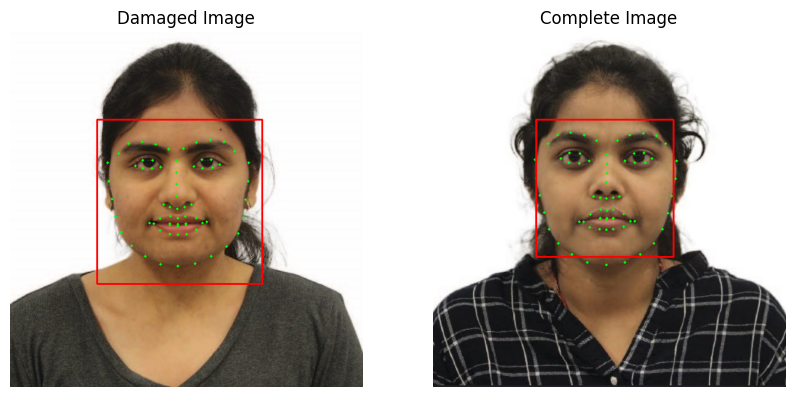

In [75]:
import dlib
import cv2
import numpy as np
from matplotlib import pyplot as plt

def detect_and_draw_faces(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale image
    faces = detector(gray, 1)

    # Loop over each detected face
    for face in faces:
        # Get the facial landmarks
        landmarks = predictor(gray, face)

        # Convert landmarks from dlib format to an array
        landmarks_array = np.array([[p.x, p.y] for p in landmarks.parts()])

        # Draw circles on the landmarks
        for (x, y) in landmarks_array:
            cv2.circle(image, (x, y), 2, (0, 255, 0), -1)

        # Draw a rectangle around the face
        cv2.rectangle(image, (face.left(), face.top()), (face.right(), face.bottom()), (0, 0, 255), 2)
    
    return image

# Replace this with your actual file paths
local_file_path = 'shape_predictor_68_face_landmarks.dat'
damaged_image_path = 'resized_damaged_face1.jpg'
complete_image_path = 'resized_complete_face1.jpg'

# Load the dlib face detector and facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(local_file_path)

# Load the damaged and complete images
damaged_image = cv2.imread(damaged_image_path)
complete_image = cv2.imread(complete_image_path)

# Detect and draw faces and facial landmarks on the damaged image
damaged_result = detect_and_draw_faces(damaged_image.copy())

# Detect and draw faces and facial landmarks on the complete image
complete_result = detect_and_draw_faces(complete_image.copy())

# Display the images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(cv2.cvtColor(damaged_result, cv2.COLOR_BGR2RGB))
axes[0].set_title('Damaged Image')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(complete_result, cv2.COLOR_BGR2RGB))
axes[1].set_title('Complete Image')
axes[1].axis('off')

plt.show()


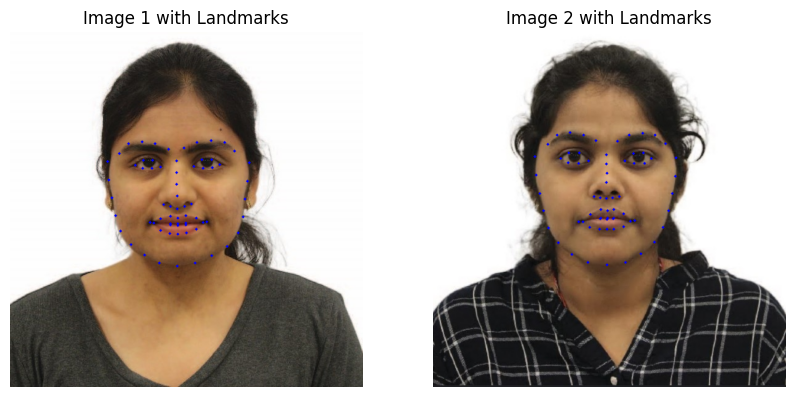

In [76]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

# Initialize dlib's face detector and landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

def get_landmarks(image, detector, predictor):
    # Convert the image to grayscale, as the detector expects a grayscale image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Use the detector to find the bounding box of the face
    faces = detector(gray)
    if len(faces) == 0:
        return None
    
    # Assume we are working with one face per image for simplicity
    face = faces[0]
    
    # Use the predictor to find the landmark points
    landmarks = predictor(gray, face)
    
    # Convert the landmark points to a 2D numpy array
    landmark_list = np.array([[p.x, p.y] for p in landmarks.parts()])
    return landmark_list

# Load the images
image1_path = 'resized_damaged_face1.jpg'  # Replace with your actual file path
image2_path = 'resized_complete_face1.jpg'  # Replace witresized_complete_face.jpgh your actual file path
image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)

# Check if images were loaded
if image1 is None or image2 is None:
    raise ValueError("Could not load one or both images. Check the file paths.")

# Obtain landmarks for both images
landmarks1 = get_landmarks(image1, detector, predictor)
landmarks2 = get_landmarks(image2, detector, predictor)

# Check if landmarks were found
if landmarks1 is None or landmarks2 is None:
    raise ValueError("Could not find landmarks in one or both images.")

# The rest of your morphing code would go here
# ...

# Just as a placeholder to show the found landmarks on the images:
for (x, y) in landmarks1:
    cv2.circle(image1, (x, y), 2, (255, 0, 0), -1)
for (x, y) in landmarks2:
    cv2.circle(image2, (x, y), 2, (255, 0, 0), -1)

# Convert the images to RGB for matplotlib display
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Display the images with landmarks
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image1_rgb)
plt.title('Image 1 with Landmarks')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(image2_rgb)
plt.title('Image 2 with Landmarks')
plt.axis('off')
plt.show()

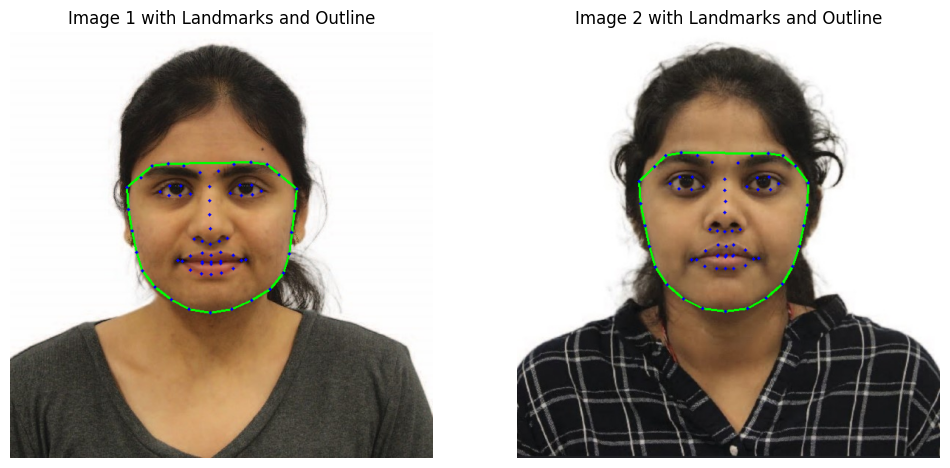

Size of outline 1: (230, 216) (width, height)
Size of outline 2: (230, 216) (width, height)


In [77]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

# Initialize dlib's face detector and landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

def get_landmarks(image, detector, predictor):
    # Convert the image to grayscale, as the detector expects a grayscale image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Use the detector to find the bounding box of the face
    faces = detector(gray)
    if len(faces) == 0:
        return None, None
    
    # Assume we are working with one face per image for simplicity
    face = faces[0]
    
    # Use the predictor to find the landmark points
    landmarks = predictor(gray, face)
    
    # Convert the landmark points to a 2D numpy array
    landmark_list = np.array([[p.x, p.y] for p in landmarks.parts()])
    
    # Find the convex hull of the landmarks to get the outline
    hull = cv2.convexHull(landmark_list)
    return landmark_list, hull

# Load the images
image1_path = 'resized_damaged_face1.jpg'  # Replace with your actual file path
image2_path = 'resized_complete_face1.jpg'  # Replace with your actual file path
image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)

# Check if images were loaded
if image1 is None or image2 is None:
    raise ValueError("Could not load one or both images. Check the file paths.")

# Obtain landmarks and outlines for both images
landmarks1, outline1 = get_landmarks(image1, detector, predictor)
landmarks2, outline2 = get_landmarks(image2, detector, predictor)

# Check if landmarks were found
if landmarks1 is None or landmarks2 is None:
    raise ValueError("Could not find landmarks in one or both images.")

# Display the images with landmarks and outlines
image1_with_landmarks = image1.copy()
image2_with_landmarks = image2.copy()

# Draw landmarks and outlines on the images
cv2.polylines(image1_with_landmarks, [outline1], True, (0, 255, 0), 2)
for (x, y) in landmarks1:
    cv2.circle(image1_with_landmarks, (x, y), 2, (255, 0, 0), -1)

cv2.polylines(image2_with_landmarks, [outline2], True, (0, 255, 0), 2)
for (x, y) in landmarks2:
    cv2.circle(image2_with_landmarks, (x, y), 2, (255, 0, 0), -1)

# Convert the images to RGB for matplotlib display
image1_with_landmarks_rgb = cv2.cvtColor(image1_with_landmarks, cv2.COLOR_BGR2RGB)
image2_with_landmarks_rgb = cv2.cvtColor(image2_with_landmarks, cv2.COLOR_BGR2RGB)

# Display the images with landmarks and outlines
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image1_with_landmarks_rgb)
plt.title('Image 1 with Landmarks and Outline')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(image2_with_landmarks_rgb)
plt.title('Image 2 with Landmarks and Outline')
plt.axis('off')
plt.show()

# Match the sizes of the outlines
outline1_rect = cv2.boundingRect(outline1)
outline2_rect = cv2.boundingRect(outline2)
x, y, w, h = outline2_rect

# Create an empty image with the same size as the bounding rectangle of outline1
outline1_resized = np.zeros((h, w, 3), dtype=np.uint8)

# Draw the outline on the empty image
cv2.polylines(outline1_resized, [outline1], True, (255, 255, 255), 2)

# Resize the outline1_resized to match the size of outline2
outline1_resized = cv2.resize(outline1_resized, (w, h))

# Display the sizes of the outlines
print("Size of outline 1:", outline1_resized.shape[1::-1], "(width, height)")
print("Size of outline 2:", outline2_rect[2:], "(width, height)")


### Using Weighted averaging

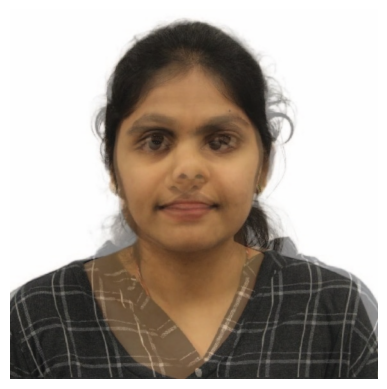

In [78]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the complete (source) and incomplete (target) facial images
complete_img = cv2.imread('resized_complete_face1.jpg')  # Replace with your complete face image path
incomplete_img = cv2.imread('resized_damaged_face1.jpg')  # This is your current target image

# Ensure the images are the same size
complete_img = cv2.resize(complete_img, (incomplete_img.shape[1], incomplete_img.shape[0]))

# Perform weighted averaging (cross-dissolve)
alpha = 0.5  # The blending ratio
blended_img = cv2.addWeighted(complete_img, alpha, incomplete_img, 1 - alpha, 0)

# Display the result
plt.imshow(cv2.cvtColor(blended_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()